In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value
import pycbc.conversions as conv


In [81]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [3]:
# plotdir = 'mtot_q_grid_plots_xas_vs_d_snr/'
# plotdir = 'mtot_q_grid_plots_xas_vs_d_det/'

In [11]:
# df = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_aLIGO.csv')
# df = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_Voyager.csv')
df = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_3G.csv')


df = df[df["DL_full_bias"]>0]
df[::25]

,Mc,eta,m1,m2,M_tot,q,chi1z,chi2z,DL,z,...,DL_stat_err,chi1z_stat_err,chi2z_stat_err,ra_stat_err,dec_stat_err,psi_stat_err,z_stat_err,z_full_bias,full_faith,full_inner_prod
0,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.9990,-0.9990,838.605340,0.168759,...,8.842776,0.004582,0.027742,0.004941,0.012592,0.020422,0.001614,0.145935,0.0,0.238424
25,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.5994,-0.3996,850.101598,0.170857,...,8.910582,0.004236,0.028034,0.004453,0.011414,0.020389,0.001623,0.264810,0.0,0.964406
50,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,-0.1998,0.1998,861.362677,0.172908,...,8.982944,0.003720,0.028153,0.003997,0.010265,0.020391,0.001633,0.266311,0.0,0.954243
75,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,0.1998,0.7992,872.390175,0.174912,...,9.055027,0.002999,0.027194,0.003541,0.009070,0.020438,0.001643,0.253283,0.0,0.975840
100,2.240417,0.082645,9.090909,0.909091,10.0,10.000000,0.7992,-0.7992,883.964991,0.177011,...,9.124826,0.000908,0.020601,0.003000,0.007602,0.020523,0.001652,0.206541,0.0,0.613556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,43.073509,0.245669,56.581008,43.418992,100.0,1.303140,0.9990,0.3996,10212.757288,1.392360,...,110.220790,0.339024,0.337997,0.004938,0.012951,0.019876,0.012190,1.592484,0.0,0.554944
12000,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,-0.7992,0.9990,9330.197275,1.293876,...,139.890485,1.040287,1.031331,0.005090,0.013273,0.019558,0.015718,1.293185,0.0,0.737424
12025,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,-0.1998,-0.5994,8702.826224,1.222843,...,125.076300,4.482506,4.492728,0.005353,0.013843,0.019639,0.014235,1.216620,0.0,0.731826
12050,43.526869,0.249994,50.251256,49.748744,100.0,1.010101,0.1998,0.0000,9407.512989,1.302569,...,140.465913,9.419212,9.433446,0.005118,0.013339,0.019626,0.015759,1.468880,0.0,0.713350


In [12]:
df.columns

Index(['Mc', 'eta', 'm1', 'm2', 'M_tot', 'q', 'chi1z', 'chi2z', 'DL', 'z',
       'snr', 'inspiral_t', 'Mc_full_bias', 'eta_full_bias', 'DL_full_bias',
       'chi1z_full_bias', 'chi2z_full_bias', 'ra_full_bias', 'dec_full_bias',
       'psi_full_bias', 'Mc_stat_err', 'eta_stat_err', 'DL_stat_err',
       'chi1z_stat_err', 'chi2z_stat_err', 'ra_stat_err', 'dec_stat_err',
       'psi_stat_err', 'z_stat_err', 'z_full_bias', 'full_faith',
       'full_inner_prod'],
      dtype='object')

## Compute z errors

In [91]:

# z_stat_err = np.zeros(len(df))
# z_full_bias = np.zeros(len(df))

# for i in range(len(df)):
#     z_stat_err[i] = np.abs(z_at_value(Planck18.luminosity_distance, (df["DL"][i] + df["DL_stat_err"][i]) * u.Mpc) - df["z"][i])
#     z_full_bias[i] = (z_at_value(Planck18.luminosity_distance, (df["DL"][i] + df["DL_full_bias"][i]) * u.Mpc) - df["z"][i])

# list((df["DL"] + df["DL_full_bias"]).values)

,Mc,eta,m1,m2,M_tot,q,chi1z,chi2z,DL,z,...,chi1z_stat_err,chi2z_stat_err,iota_stat_err,ra_stat_err,dec_stat_err,psi_stat_err,z_stat_err,z_full_bias,full_faith,full_inner_prod


In [32]:
# df["z_stat_err"] = z_stat_err
# df["z_full_bias"] = z_full_bias

## Compute m1, m2 errors

In [126]:
# Detector Frame
def m1_m2_from_df(df):
    mchirp = df["Mc"]
    eta = df["eta"]

    sigMc = df["Mc_stat_err"]
    sigEta = df["eta_stat_err"]

    aux0=((3.+((3.*((1.+(-4.*eta))**0.5))+(10.*(((1.+(-4.*eta))**-0.5)*eta))))**2)
    aux1=(aux0*((mchirp**2)*(sigEta**2)))+(25.*((((1.+((1.+(-4.*eta))**0.5))**2))*((eta**2)*(sigMc**2))))
    m1_stat_err=0.1*(np.sqrt(((eta**-3.2)*aux1)))

    # without redshift
    aux0=(((0.3*((1.+(-4.*eta))**0.5))+((-0.3*((1.+(-4.*eta))**1.))+(-1.*eta)))**2)
    aux1=(((1.+(-4.*eta))**-1.)*(aux0*((mchirp**2)*(sigEta**2))))+((((0.5+(-0.5*((1.+(-4.*eta))**0.5)))**2))*((eta**2)*(sigMc**2)))
    m2_stat_err=np.sqrt(((eta**-3.2)*aux1))

    bias_mc = df["Mc_full_bias"]
    bias_eta = df["eta_full_bias"]


    mchirp_biased = (df["Mc"] + bias_mc)
    eta_biased = np.minimum(df["eta"]+bias_eta, 0.25) # make sure that eta doesn't exceed what is physically possible

    m1= conv.mass1_from_mchirp_eta(df["Mc"], df["eta"])
    m2 = conv.mass2_from_mchirp_eta(df["Mc"], df["eta"])

    m1_biased = conv.mass1_from_mchirp_eta(mchirp_biased, eta_biased)
    m2_biased = conv.mass2_from_mchirp_eta(mchirp_biased, eta_biased)

    m1_full_bias = m1_biased - m1
    m2_full_bias = m2_biased - m2

    return m1_full_bias, m1_stat_err, m2_full_bias, m2_stat_err


In [110]:
# z = df["z"]
# mchirp = df["Mc"]/ (1+z)
# eta = df["eta"]

# sigMc = df["Mc_stat_err"]
# sigEta = df["eta_stat_err"]
# sigZ = df["z_stat_err"]

# # sigMc = np.sqrt((((mchirp**2)*((sigZ**2)*((1.+z)**-4.)))+((sigMc_raw**2)*((1.+z)**-2.))))

# m1_mu_detections = df["m1"] / (1+z)
# m2_mu_detections = df["m2"] / (1+z)

# # # compute variance of m1
# # aux0=0.25*((((1.+((1.+(-4.*eta))**0.5))**2))*((eta**2)*((mchirp**2)*(sigZ**2))))
# # aux1=(((0.3*((1.+(-4.*eta))**0.5))+((0.3*((1.+(-4.*eta))**1.))+(1.*eta)))**2)
# # aux2=(((1.+((1.+(-4.*eta))**0.5))**2))*((eta**2)*((sigMc**2)*(((1.+z)**2))))
# # aux3=(((1.+(-4.*eta))**-1.)*(aux1*((mchirp**2)*((sigEta**2)*(((1.+z)**2))))))+(0.25*aux2)
# # m1_variance=(eta**-3.2)*(((1.+z)**-4.)*(aux0+aux3))
# # m1_variance = m1_variance.values
# # m1_stat_err = np.sqrt(m1_variance)

# # without redshift
# aux0=((3.+((3.*((1.+(-4.*eta))**0.5))+(10.*(((1.+(-4.*eta))**-0.5)*eta))))**2)
# aux1=(aux0*((mchirp**2)*(sigEta**2)))+(25.*((((1.+((1.+(-4.*eta))**0.5))**2))*((eta**2)*(sigMc**2))))
# m1_stat_err=0.1*(np.sqrt(((eta**-3.2)*aux1)))

# # # compute variance of m2
# # aux0=0.25*((((-1.+((1.+(-4.*eta))**0.5))**2))*((eta**2)*((mchirp**2)*(sigZ**2))))
# # aux1=(((0.3*((1.+(-4.*eta))**0.5))+((-0.3*((1.+(-4.*eta))**1.))+(-1.*eta)))**2)
# # aux2=(((0.5+(-0.5*((1.+(-4.*eta))**0.5)))**2))*((eta**2)*((sigMc**2)*(((1.+z)**2))))
# # aux3=(((1.+(-4.*eta))**-1.)*(aux1*((mchirp**2)*((sigEta**2)*(((1.+z)**2))))))+aux2
# # m2_variance=(eta**-3.2)*(((1.+z)**-4.)*(aux0+aux3))
# # m2_variance = m2_variance.values
# # m2_stat_err = np.sqrt(m2_variance)

# # without redshift
# aux0=(((0.3*((1.+(-4.*eta))**0.5))+((-0.3*((1.+(-4.*eta))**1.))+(-1.*eta)))**2)
# aux1=(((1.+(-4.*eta))**-1.)*(aux0*((mchirp**2)*(sigEta**2))))+((((0.5+(-0.5*((1.+(-4.*eta))**0.5)))**2))*((eta**2)*(sigMc**2)))
# m2_stat_err=np.sqrt(((eta**-3.2)*aux1))


# bias_mc = df["Mc_full_bias"]
# bias_eta = df["eta_full_bias"]


# mchirp_biased = (df["Mc"] + bias_mc) / (1+z)
# eta_biased = np.minimum(df["eta"]+bias_eta, 0.25) # make sure that eta doesn't exceed what is physically possible
# # eta_biased = df["eta"]+bias_eta

# m1_biased = conv.mass1_from_mchirp_eta(mchirp_biased, eta_biased)
# m2_biased = conv.mass2_from_mchirp_eta(mchirp_biased, eta_biased)

# m1_full_bias = m1_biased - m1_mu_detections
# m2_full_bias = m2_biased - m2_mu_detections

# df["m1_full_bias"] = m1_full_bias
# df["m2_full_bias"] = m2_full_bias

# df["m1_stat_err"] = m1_stat_err
# df["m2_stat_err"] = m2_stat_err

# Plotting Functions

In [13]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, eta=None, q=None, qmax=None, chi1z=None, chi2z=None, equal_spin=False, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]
    if mtot is not None:
        # mtot = mtot*(1+z)
        mask = mask * (df["M_tot"] > (mtot-1)) * (df["M_tot"] < (mtot+1)) 
        title = title + " (M_tot=" + str(np.round(mtot,2)) + " $M_\odot$)"
    
    if equal_spin:
        mask = mask * ((df["chi1z"] == df["chi2z"]))
        title = title + " ($\chi_1=\chi_2$)"

    if chi1z is not None:
        chimax = chi1z+0.01
        chimin = chi1z-0.01
        # chimax = np.maximum(chi1z+0.99, chi1z*1.01)
        # chimin = np.minimum(chi1z*0.99, chi1z*1.01)
        mask = mask * (df["chi1z"] > chimin) * (df["chi1z"] < chimax) 
        title = title + " ($\chi_1$=" + str(np.round(chi1z,2)) + ")"
    
    if chi2z is not None:
        chimax = chi2z+0.01
        chimin = chi2z-0.01
        # chimax = np.maximum(chi2z*0.99, chi2z*1.01)
        # chimin = np.minimum(chi2z*0.99, chi2z*1.01)
        mask = mask * (df["chi2z"] > chimin) * (df["chi2z"] < chimax)  
        title = title + " ($\chi_2$=" + str(np.round(chi2z,2)) + ")"

    if q is not None:
        q_max = q+0.1
        q_min = q-0.1
        mask = mask * (df["q"] > q_min) * (df["q"] < q_max)  
        title = title + " (q=" + str(np.round(q,1)) + ")"

    if eta is not None:
        eta_max = eta+0.01
        eta_min = eta-0.01
        mask = mask * (df["eta"] > eta_min) * (df["eta"] < eta_max)  
        title = title + " (eta=" + str(np.round(eta,2)) + ")"

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    # if show_unbiased:
    #     unbiased_mask = unbiased_mask[mask]
    #     plt.scatter(x[unbiased_mask], y[unbiased_mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
    #     plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    # if savefig is not None:
    #     plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

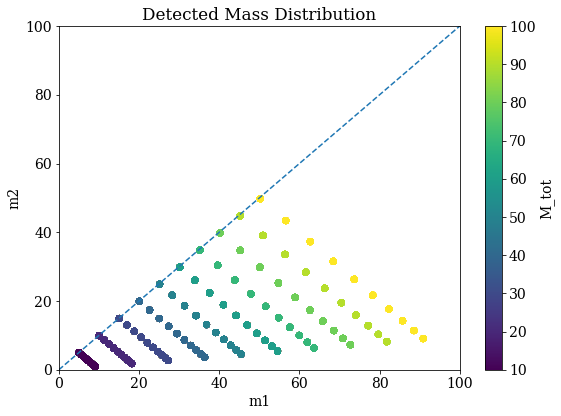

In [12]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Detected Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


In [97]:
print(np.median(df["z"]))
print(np.median(df["snr"]))

2.517066244585127
0.9890234470811119


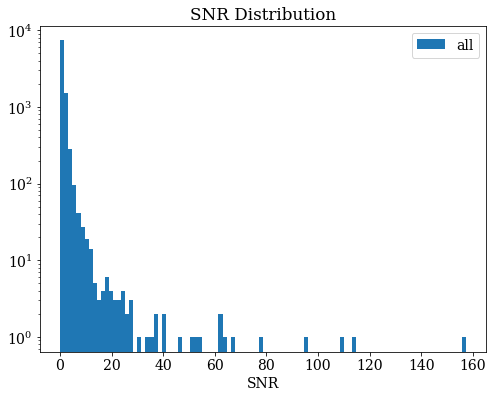

In [102]:
# SNR Distribution
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.linspace(0.1, 1+np.max(df["snr"]), 101)

plt.hist(df["snr"], bins, label="all")

z = df["z"].iloc[0]

# for mtot in mtots:
#     mask = (df["M_tot"] < mtot*(1.1+ z)) * (df["M_tot"]> mtot*(0.9+ z)) 
#     plt.hist(df["snr"][mask], bins, histtype='step', lw=3, label=f"Mtot={mtot} $M_\odot$")


plt.xlabel("SNR")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("SNR Distribution")
plt.semilogy()
# plt.savefig(plotdir + 'snr_dist.pdf')
plt.show()

[0.00172263 0.00194832 0.00207683 ... 0.72461293 0.75283501 0.75429553]


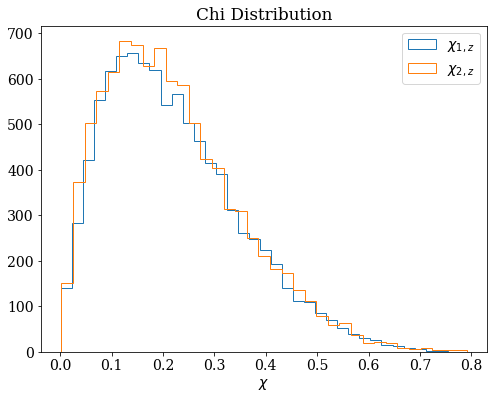

In [103]:
# Chi Distribution
fig, ax = plt.subplots(figsize=(8, 6))

# bins = np.linspace(5, 50+np.max(df["snr"]), 20)
print(np.unique(df["chi1z"]))

plt.hist(df["chi1z"], bins=35, histtype='step', label="$\chi_{1,z}$")
plt.hist(df["chi2z"], bins=35, histtype='step', label="$\chi_{2,z}$")


plt.xlabel("$\chi$")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("Chi Distribution")

plt.show()

In [104]:
df["M_tot"]

0       210.592064
1        18.831395
2        12.505929
3        55.375566
4        60.760942
           ...    
9585     42.206290
9586     22.367737
9587     77.183704
9588     56.282469
9589     89.367667
Name: M_tot, Length: 9408, dtype: float64

# Calibration to NR

In [11]:
# https://arxiv.org/pdf/1508.07253.pdf
# TABLE I (only the X1 = X2 waveforms)

nr_waveforms = {       #[eta, X1, X2]
    'SXS:BBH:0156':    [0.25, -0.95, -0.95], 
    'SXS:BBH:0151':    [0.25, -0.6, -0.6],
    'SXS:BBH:0001':    [0.25, 0., 0.],
    'SXS:BBH:0152':    [0.25, 0.6, 0.6],
    'SXS:BBH:0172':    [0.25, 0.98, 0.98],
    'SXS:BBH:0167':    [0.16, 0., 0.],
    'SXS:BBH:0063':    [0.099, 0., 0.],
    
    'A6 BAM': [0.16, -0.75, -0.75 ], 
    'A7 BAM': [0.16, -0.5, -0.5],
    'A9 BAM': [0.16, 0.5, 0.5],
    'A10 BAM': [0.16, 0.75, 0.75],
    'A11 BAM': [0.099, -0.85, -0.85],
    'A15 BAM': [0.099, 0.85, 0.85]
    # 'A18 BAM': [0.05, 0., 0.] 
    }

## Bias

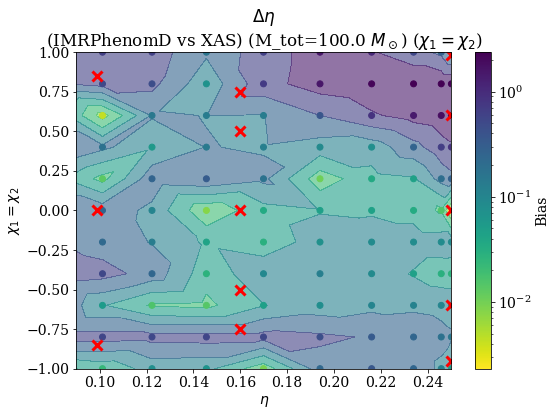

In [12]:
mtot=100.0
qmax=None
chi1z=0.0
chi2z=0.0


x = df["eta"]
y = df["chi1z"]
z  = np.abs(df["eta_full_bias"]/df["eta"])
# z  = np.abs(df["Mc_full_bias"]/df["Mc"])


# plot_bias_features(df["eta"], df["chi1z"], np.abs(df["eta_full_bias"]/df["eta"]), mtot=mtot, equal_spin=True, qmax=qmax, colormap="viridis_r",# norm=LogNorm(),
#     title="$\Delta \eta$ \n(IMRPhenomD vs XAS)", xlabel="$\eta$", ylabel="$\chi_1=\chi_2$", cbar_label="Bias", plt_show=False)

plot_bias_features(x, y, z, mtot=mtot, equal_spin=True, qmax=qmax, colormap="viridis_r", norm=LogNorm(),
    title="$\Delta \eta$ \n(IMRPhenomD vs XAS)", xlabel="$\eta$", ylabel="$\chi_1=\chi_2$", cbar_label="Bias", plt_show=False)

mask = (np.abs(df["M_tot"]-mtot) < 0.1) * (df["chi1z"]==df["chi2z"])
x = x[mask]
y = y[mask]
z  = z[mask]
z  = np.log(z[mask])

CS = plt.tricontourf(x, y, z, zorder=0, alpha=0.6, cmap='viridis_r')
# plt.tricontour(x,y, z, colors='k')

# cbar = plt.colorbar(CS)
# cbar.ax.set_ylabel('Faithfulness')

for waveform in nr_waveforms:
    plt.plot(nr_waveforms[waveform][0], nr_waveforms[waveform][1],  \
             marker='x', ms=10, mew=3, color='r')
    

plt.ylim(-1, 1)
plt.xlim(0.09, 0.25)
plt.show()

## Faithfulness

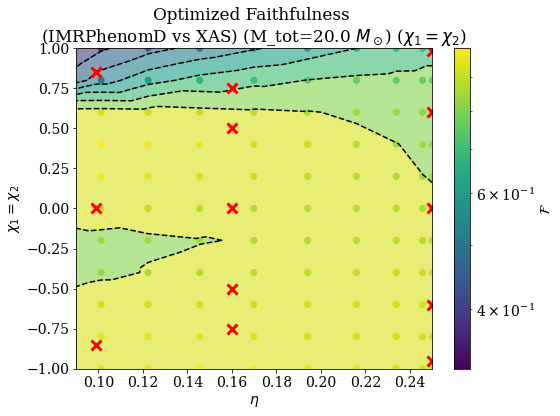

In [16]:
mtot=20.0
qmax=None
chi1z=0.0
chi2z=0.0

plot_bias_features(df["eta"], df["chi1z"], np.abs(df["full_inner_prod"]), mtot=mtot, equal_spin=True, qmax=qmax, colormap="viridis", norm=LogNorm(),
    title="Optimized Faithfulness \n(IMRPhenomD vs XAS)", xlabel="$\eta$", ylabel="$\chi_1=\chi_2$", cbar_label="$\mathcal{F}$", plt_show=False, zorder=1)

mask = (np.abs(df["M_tot"]-mtot) < 0.1) * (df["chi1z"]==df["chi2z"])
x = df["eta"][mask]
y = df["chi1z"][mask]
z  = np.log(df["full_inner_prod"][mask])

# fig, ax = plt.subplots(figsize=(8,6))
CS = plt.tricontourf(x, y, z, zorder=0, alpha=0.6)
plt.tricontour(x,y, z, colors='k')
# cbar = plt.colorbar(CS)
# cbar.ax.set_ylabel('Faithfulness')

for waveform in nr_waveforms:
    plt.plot(nr_waveforms[waveform][0], nr_waveforms[waveform][1],  \
             marker='x', ms=10, mew=3, color='r')


plt.ylim(-1, 1)
plt.xlim(0.09, 0.25)

plt.xlabel("$\eta$")
plt.ylabel("$\chi_1=\chi_2$")

plt.show()

# compare to Fig 18,left panels of https://arxiv.org/pdf/1508.07253.pdf

# 1D Bias Trends

34.821494936101445
1.2922251654592856
[1215.24313932]


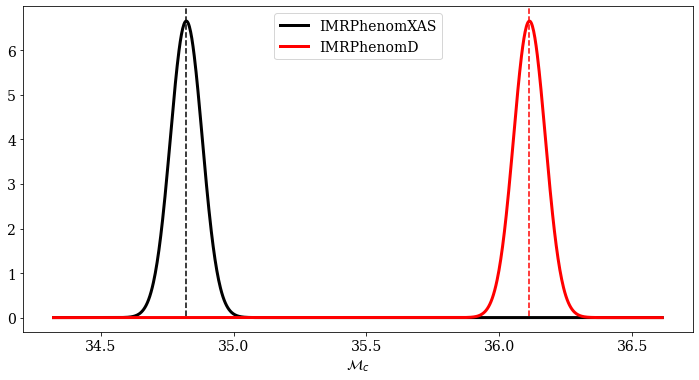

In [25]:
from scipy.stats import norm

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

mask = (np.abs(df["Mc"]-35.0)<2) * (df["q"] < 1.1) * (np.abs(df["chi1z"]-0.0)<0.1) * (np.abs(df["chi2z"]-0.0)<0.1)


mc_inj = df[mask]["Mc"].values[0]
stat_err = df[mask]["Mc_stat_err"].values[0]
bias = df[mask]["Mc_full_bias"].values[0]

print(mc_inj)
print(bias)
print(df[mask]["DL"].values)
mc = np.linspace(mc_inj-0.5, mc_inj+bias+.5, 1000)

plt.plot(mc, norm.pdf(mc, mc_inj, stat_err), lw=3, color='k', label="IMRPhenomXAS")
# plt.plot(mc, norm.pdf(mc, mc_inj+0.103, stat_err),lw=3, color='orange', label="$\lambda \\approx 0.1$")
plt.plot(mc, norm.pdf(mc, mc_inj+bias, stat_err),lw=3, color='r', label="IMRPhenomD")

plt.axvline(x=mc_inj, ymin=0.05, color='k', ls='--')
# plt.axvline(x=mc_inj+0.103,  ymin=0.05, color='orange', ls='--')
plt.axvline(x=mc_inj+bias,  ymin=0.05, color='r', ls='--')

plt.xlabel("$\mathcal{M}_{c}$")
plt.legend()
plt.show()

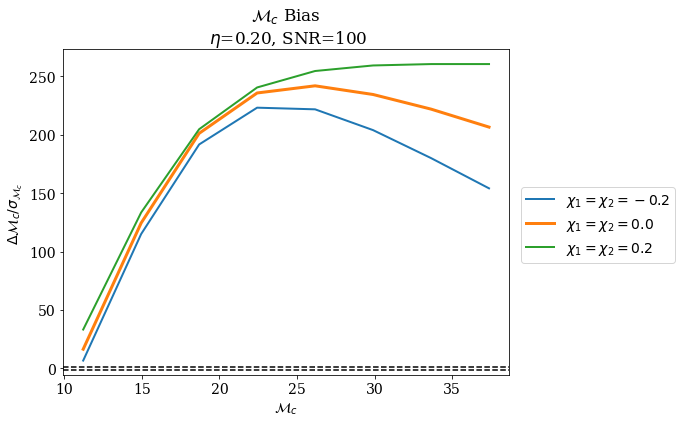

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

x = df["Mc"]
y = 10*df["Mc_full_bias"]/df["Mc_stat_err"]

chi = -0.2
mask = (np.abs(df["chi1z"]-chi)<0.1) * (np.abs(df["chi2z"]-chi)<0.1)  * (df["Mc"]>10.0) * (np.abs(df["eta"]-0.20) < 0.01)
plt.plot(x[mask], y[mask], lw=2, label=f"$\chi_1 = \chi_2 = {chi}$")


chi = 0.0
mask = (np.abs(df["chi1z"]-chi)<0.1) * (np.abs(df["chi2z"]-chi)<0.1)  * (df["Mc"]>10.0) * (np.abs(df["eta"]-0.20) < 0.01)
plt.plot(x[mask], y[mask], lw=3, label=f"$\chi_1 = \chi_2 = {chi}$")

chi = 0.2
mask = (np.abs(df["chi1z"]-chi)<0.1) * (np.abs(df["chi2z"]-chi)<0.1)  * (df["Mc"]>10.0) * (np.abs(df["eta"]-0.20) < 0.01)
plt.plot(x[mask], y[mask], lw=2, label=f"$\chi_1 = \chi_2 = {chi}$")


plt.axhline(y=1, ls='--', color='k')
plt.axhline(y=-1, ls='--', color='k')

# for q in (np.unique(np.round(np.unique(df["q"]), 2)))[3:6]:
#     mask = (np.abs(df["q"]-q)<0.1) * (df["chi1z"] == 0.0) * (df["chi2z"] == 0.0) * (df["Mc"]>10.0)
#     plt.plot(x[mask], y[mask], lw=2, label=f'q={q:.1f}')

plt.title("$\mathcal{M}_{c}$ Bias \n $\eta$=0.20, SNR=100")
plt.xlabel("$\mathcal{M}_{c}$")
plt.ylabel("$\Delta \mathcal{M}_{c} / \sigma_{\mathcal{M}_{c}}$")
plt.legend(bbox_to_anchor=(1.01, 0.6))
plt.show()

# Relative Bias Histograms

In [5]:
def bias_hist_plot(df, ax, title='', vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'], snr_factor = 1.0,
                    bins=30, legend_loc='upper right', snr_lim = None ,**kwargs):
    snr_cut_str = " "
    if snr_lim is not None:
        df = df[df["snr"]>snr_lim]
        snr_cut_str = f", SNR>{snr_lim:.1f}"
        
    for var in vars:
        data = snr_factor* df[f"{var}_full_bias"]/df[f"{var}_stat_err"]
        bias_perc = 100* np.sum(np.abs(data)>1.0) / len(data)
        label=var + f" ({bias_perc:.1f}% biased)"
        ax.hist(data, bins=bins, histtype='step', label=label, **kwargs)

    ax.set_xlabel("$\Delta \\theta / \sigma_{\\theta}$")
    ax.set_title(f"{title} Bias Significance, Median SNR={np.median(df['snr']) * snr_factor:.1f}" + snr_cut_str + f"\n Median DL={np.median(df['DL'])/ snr_factor:.2f} Mpc")

    ax.legend(loc=legend_loc)



## Constant SNR grids

In [354]:
# # # Grids
df_ligo = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_aLIGO.csv')
df_voy = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_Voyager.csv')
df_3g = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_3G.csv')

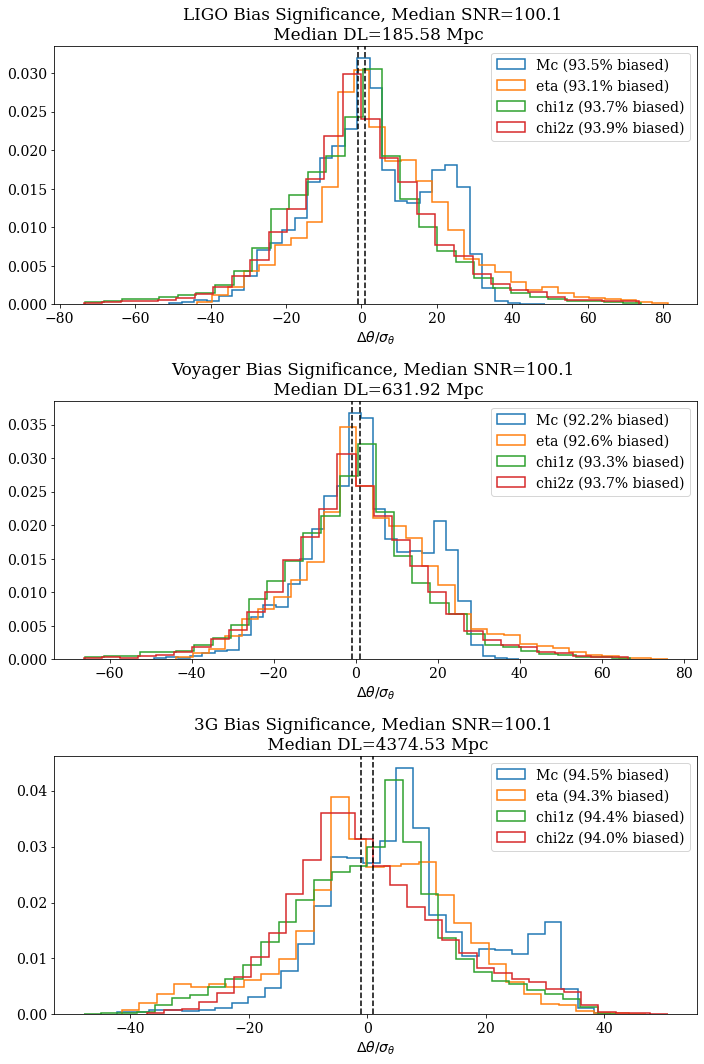

In [355]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

vars = ['Mc', 'eta', 'chi1z', 'chi2z']
snr_factor = 1.0
bins=30

snr_lim = None
bias_hist_plot(df_ligo, ax1, title='LIGO', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

bias_hist_plot(df_voy, ax2, title='Voyager', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

bias_hist_plot(df_3g, ax3, title='3G', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

for ax in [ax1, ax2, ax3]:
    ax.axvline(x=1, color='k', ls='--')
    ax.axvline(x=-1, color='k', ls='--')
    
plt.tight_layout()
plt.show()

## Constant DL grids

In [337]:
# # Grids
df_ligo = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_aLIGO.csv')
df_voy = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_Voyager.csv')
df_3g = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_3G.csv')

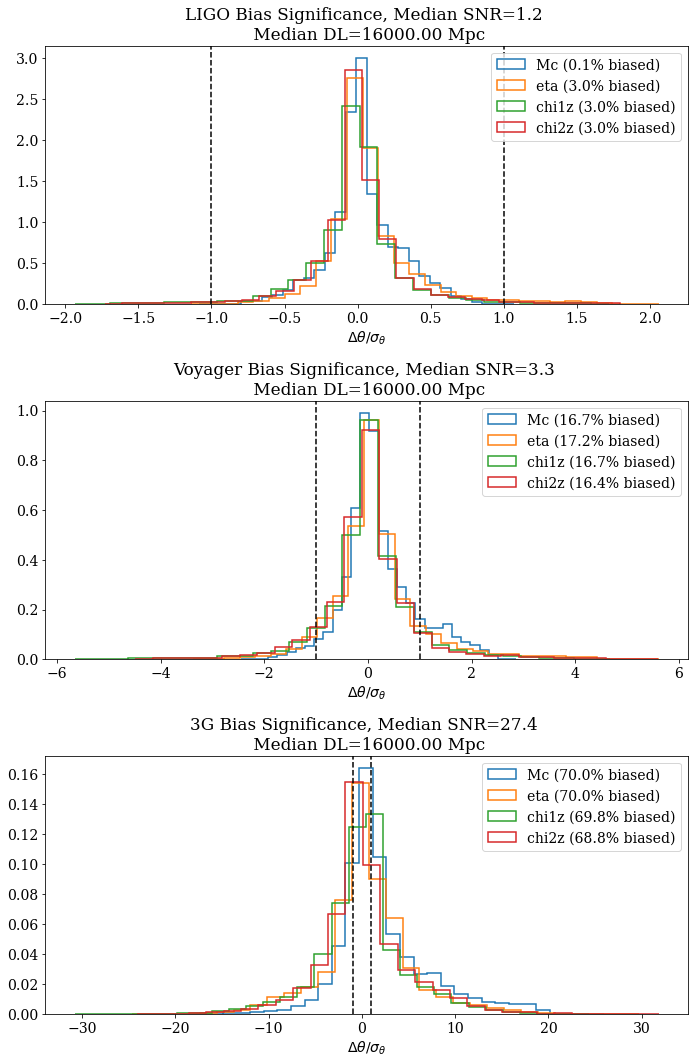

In [338]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

vars = ['Mc', 'eta', 'chi1z', 'chi2z']
snr_factor = 1.0
bins=30
snr_lim=None

bias_hist_plot(df_ligo, ax1, title='LIGO', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

bias_hist_plot(df_voy, ax2, title='Voyager', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

bias_hist_plot(df_3g, ax3, title='3G', vars=vars, snr_factor=snr_factor, bins=bins, snr_lim=snr_lim,
               lw=1.5, density=True)

for ax in [ax1, ax2, ax3]:
    ax.axvline(x=1, color='k', ls='--')
    ax.axvline(x=-1, color='k', ls='--')
    
plt.tight_layout()
plt.show()

# Biased Volume vs SNR

In [339]:
def compute_bias_fractions(data, factors, snr_lim=None, df=None, **kwargs):
    biases = np.zeros(len(data))
    bias_fractions = np.zeros(len(factors))
    bias_numbers = np.zeros(len(factors))

    for i in range(len(factors)):
        biases = data*factors[i]
        if snr_lim is not None:
            biases = biases[df["snr"]*factors[i] > snr_lim]
            
        if len(biases)>0:
            bins = [0,1,np.inf]
            data_binned, bin_bins = np.histogram(np.abs(biases), bins=bins, **kwargs)
            bias_fractions[i] = data_binned[1] / np.sum(data_binned)
            bias_numbers[i] = data_binned[1]
        else:
            bias_fractions[i] = None
    
    return bias_fractions, bias_numbers

## Fixed SNR Grid

In [340]:
# # # Grids
df_ligo = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_aLIGO.csv')
df_voy = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_Voyager.csv')
df_3g = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/snr_100.0_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_3G.csv')

In [341]:
def bias_v_snr_plot(df, ax, title='', snrs = np.linspace(10, 100, 10), vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'],
                    legend_loc='upper right', total=False, **kwargs):
    
    base_snr = np.round(df["snr"].values[0],1)
    factors = snrs/base_snr

    for var in vars:
        data = df[f"{var}_full_bias"]/df[f"{var}_stat_err"]
        bias_fracs, bias_numbers = compute_bias_fractions(data, factors)
        
        if total:
            ax.plot(snrs, bias_numbers, label=var, **kwargs)
            ax.set_ylabel("Biased Events") 
        else:
            ax.plot(snrs, bias_fracs, label=var, **kwargs)
            ax.set_ylabel("Biased Fraction")

    ax.set_title(f"{title} Biased Volume")
    ax.set_xlabel("SNR")
    
    ax.legend(loc=legend_loc)
    ax.grid()

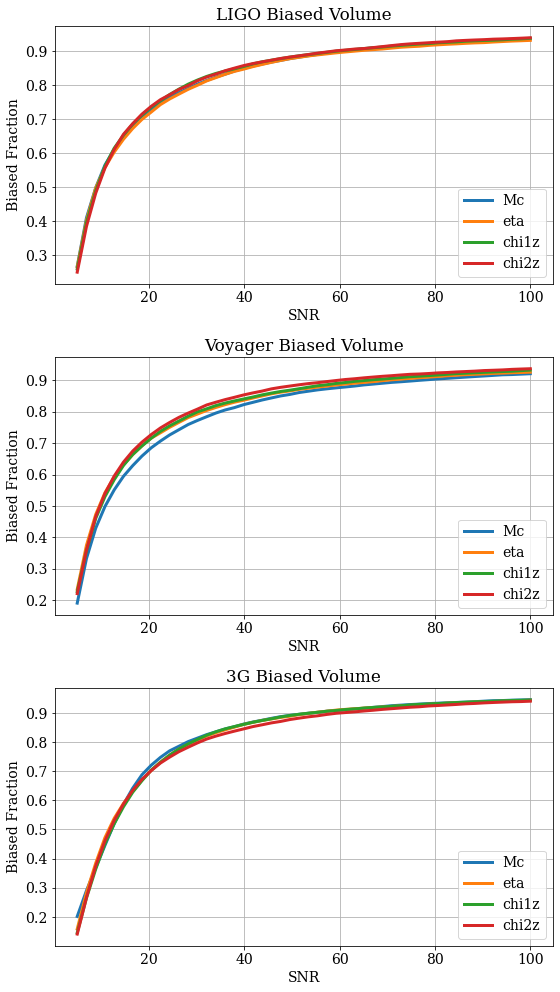

In [342]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(8, 14))

vars = ['Mc', 'eta', 'chi1z', 'chi2z']
snrs = np.linspace(5, 100, 50)

legend_loc='lower right'
lw=3

total=False

bias_v_snr_plot(df_ligo, ax1, title='LIGO', vars=vars, snrs=snrs, total=total, legend_loc=legend_loc, lw=lw)
bias_v_snr_plot(df_voy, ax2, title='Voyager', vars=vars, snrs=snrs, total=total,  legend_loc=legend_loc, lw=lw)
bias_v_snr_plot(df_3g, ax3, title='3G', vars=vars, snrs=snrs, total=total, legend_loc=legend_loc, lw=lw)


plt.tight_layout()
plt.show()


## Fixed DL Grids

In [343]:
# # Grids
df_ligo = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_aLIGO.csv')
df_voy = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_Voyager.csv')
df_3g = pd.read_csv('mtot_q_chi1z_chi2z_grids_xas_vs_d/DL_16000_mtot_10_100_q_0.10_0.99_chi1z_-1.0_1.0_3G.csv')


In [344]:
def bias_v_dl_plot(df, ax, title='', DLs = np.linspace(10, 100, 10), vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'],
                     total=False, snr_lim=None, legend_loc='upper right', **kwargs):
    
    base_DL = np.round(df["DL"].values[0],1)
    factors = base_DL/DLs

    snr_cut_str = ""
    if snr_lim is not None:
        snr_cut_str = f", SNR>{snr_lim:.1f}"

    for var in vars:
        data = df[f"{var}_full_bias"]/df[f"{var}_stat_err"]
        bias_fracs, bias_numbers = compute_bias_fractions(data, factors, snr_lim=snr_lim, df=df)
        
        if total:
            ax.plot(DLs, bias_numbers, label=var, **kwargs)
            ax.set_ylabel("Biased Events") 
        else:
            ax.plot(DLs, bias_fracs, label=var, **kwargs)
            ax.set_ylabel("Biased Fraction")

    ax.set_title(f"{title} Biased Volume {snr_cut_str}")
    ax.set_xlabel("DL (Mpc)")
    ax.legend(loc=legend_loc)
    ax.grid()

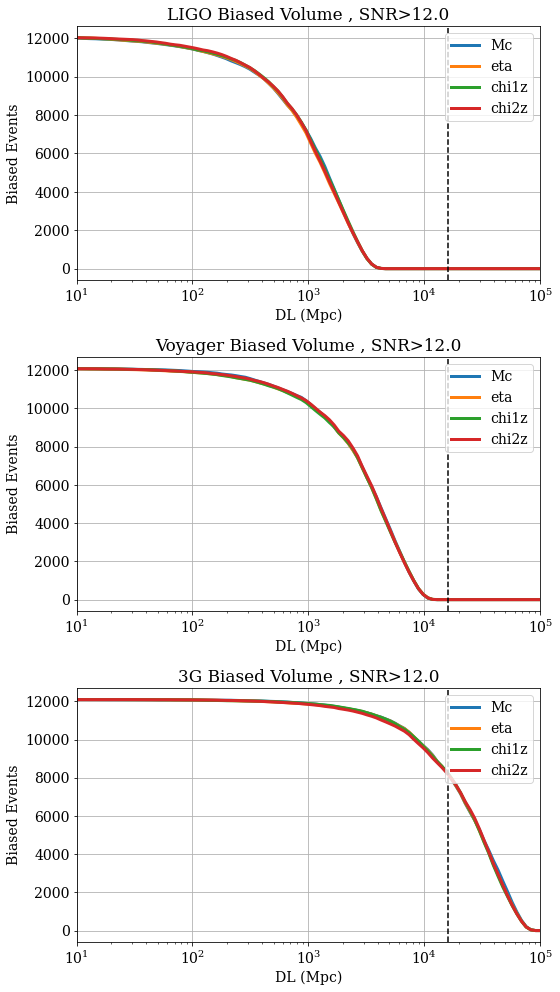

In [345]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(8, 14))

vars = ['Mc', 'eta', 'chi1z', 'chi2z']
DLs = np.geomspace(10, 1e5, 100)

legend_loc='upper right'
lw=3
snr_lim=12
total=True

bias_v_dl_plot(df_ligo, ax1, title='LIGO', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total, legend_loc=legend_loc, lw=lw)
bias_v_dl_plot(df_voy, ax2, title='Voyager', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total,  legend_loc=legend_loc, lw=lw)
bias_v_dl_plot(df_3g, ax3, title='3G', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total,  legend_loc=legend_loc, lw=lw)

for ax in [ax1, ax2, ax3]:
    ax.axvline(x=16000, color='k', ls='--')
    ax.set_xscale('Log')
    ax.set_xlim(DLs[0], DLs[-1])
    # ax.set_yscale('Log')

plt.tight_layout()
plt.show()


## Visualize the peak of star formation

In [346]:
def p_z_madau_fragos(z, z_min, z_max):
    '''
    Return normalized z-distribution from the Madau Fragos (2017)
    star formation rate density.
    '''
    term_1 = (1+z)**(2.6)
    term_2 = 1 + ((1+z)/3.2)**(6.2)

    psi = 0.01 * term_1/term_2
    norm = np.sum(psi)
    psi = psi/norm

    return psi


from astropy.cosmology import Planck18, z_at_value

DLs = np.geomspace(10, 1e5, 100)
# z_range = np.linspace(0.01, 50.0, 100)
z_range = np.zeros(len(DLs))
for i, DL in enumerate(DLs):
    z_range[i] = z_at_value(Planck18.luminosity_distance, DL * u.Mpc)

pdf_z = p_z_madau_fragos(z_range, 0.01, 50.0)


DL_range = Planck18.luminosity_distance(z_range).value
DL_pdf_madau = Planck18.luminosity_distance(pdf_z).value
DL_pdf_madau = DL_pdf_madau/np.max(DL_pdf_madau)

# plt.plot(z_range,pdf_z)
# plt.show()

# plt.plot(DL_range, DL_pdf_madau)

# numsteps = 100 # how many steps to take in shading
# for i in range(1,numsteps+1):
#     mask = (DL_pdf_madau > (1.0/i))
#     plt.fill_between(DL_range[mask], np.zeros(len(DL_range[mask])), DL_pdf_madau[mask], color='r', alpha=.1/i)

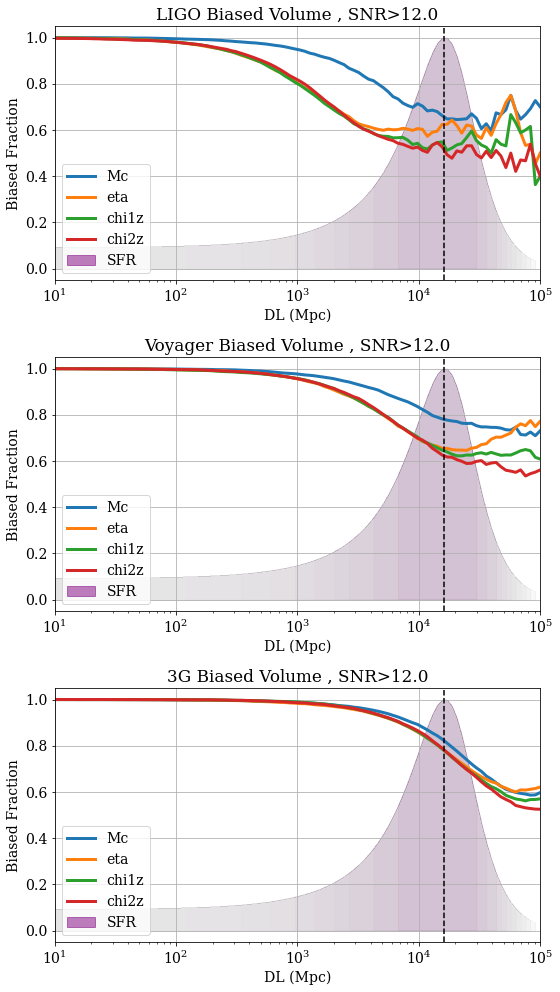

In [351]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(8, 14))

vars = ['Mc', 'eta', 'chi1z', 'chi2z']
DLs = np.geomspace(10, 1e5, 100)

legend_loc='lower left'
lw=3
snr_lim=12
total=False



bias_v_dl_plot(df_ligo, ax1, title='LIGO', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total, legend_loc=legend_loc, lw=lw)
bias_v_dl_plot(df_voy, ax2, title='Voyager', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total,  legend_loc=legend_loc, lw=lw)
bias_v_dl_plot(df_3g, ax3, title='3G', vars=vars, DLs=DLs, snr_lim=snr_lim, total=total,  legend_loc=legend_loc, lw=lw)


if total:
    scale=12100
else: scale=1.0


for ax in [ax1, ax2, ax3]:
    ax.axvline(x=16000, color='k', ls='--')
    ax.set_xscale('Log')
    ax.set_xlim(DLs[0], DLs[-1])
    # ax.set_yscale('Log')

    # SFR with solid fill
    # ax.fill_between(DL_range, np.zeros(len(DL_range)), 12000*DL_pdf_madau, alpha=0.2, label='SFR')

    # SFR with Shading
    numsteps = 200 # how many steps to take in shading
    for i in range(1,numsteps+1):
        mask = (DL_pdf_madau > (1.0/i))
        if i==1:
            ax.fill_between(DL_range[mask], np.zeros(len(DL_range[mask])), scale*DL_pdf_madau[mask], color='purple', alpha=.5, label='SFR')
        ax.fill_between(DL_range[mask], np.zeros(len(DL_range[mask])), scale*DL_pdf_madau[mask], color='purple', alpha=.07/i)
        
    ax.legend()
    
    

plt.tight_layout()
plt.show()


# Power-law Populations, 1D Bias Histograms

In [94]:
def bias_hist_plot(df, ax, title='', vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL'], snr_factor = 1.0,
                    bins=30, legend_loc='upper right', snr_lim = None ,kde=False, labels=None, **kwargs):
    snr_cut_str = " "
    if snr_lim is not None:
        df = df[df["snr"]>snr_lim]
        snr_cut_str = f"SNR>{snr_lim:.1f}"
        
    for var in vars:
        data = snr_factor* df[f"{var}_full_bias"]/df[f"{var}_stat_err"]
        bias_perc = 100* np.sum(np.abs(data)>1.0) / len(data)
        if labels is None:
            label=var + f" ({bias_perc:.1f}% biased)"
        else:
            label = labels[var] + f" ({bias_perc:.1f}% biased)"
        if not kde:
            ax.hist(data, bins=bins, histtype='step', label=label, **kwargs)
        else:
            sns.kdeplot(data=data, ax=ax, bw_adjust=1, gridsize=1000, label=label)

    ax.set_xlabel("$\Delta \\theta / \sigma_{\\theta}$")
    ax.set_title(f"{title} Bias Significance, {snr_cut_str}")

    ax.legend(loc=legend_loc)



In [127]:
# Populations
df_ligo = pd.read_csv('powerlaw_3.5_lams_smooth/powerlaw_alpha_3.5_0_19200_aLIGO.csv')
df_voy = pd.read_csv('powerlaw_3.5_lams_smooth/powerlaw_alpha_3.5_0_19200_Voyager.csv')
df_3g = pd.read_csv('powerlaw_3.5_lams_smooth/powerlaw_alpha_3.5_0_19200_3G.csv')

df_ligo["m1_full_bias"], df_ligo["m1_stat_err"], df_ligo["m2_full_bias"], df_ligo["m2_stat_err"] = m1_m2_from_df(df_ligo)
df_voy["m1_full_bias"], df_voy["m1_stat_err"], df_voy["m2_full_bias"], df_voy["m2_stat_err"] = m1_m2_from_df(df_voy)
df_3g["m1_full_bias"], df_3g["m1_stat_err"], df_3g["m2_full_bias"], df_3g["m2_stat_err"] = m1_m2_from_df(df_3g)

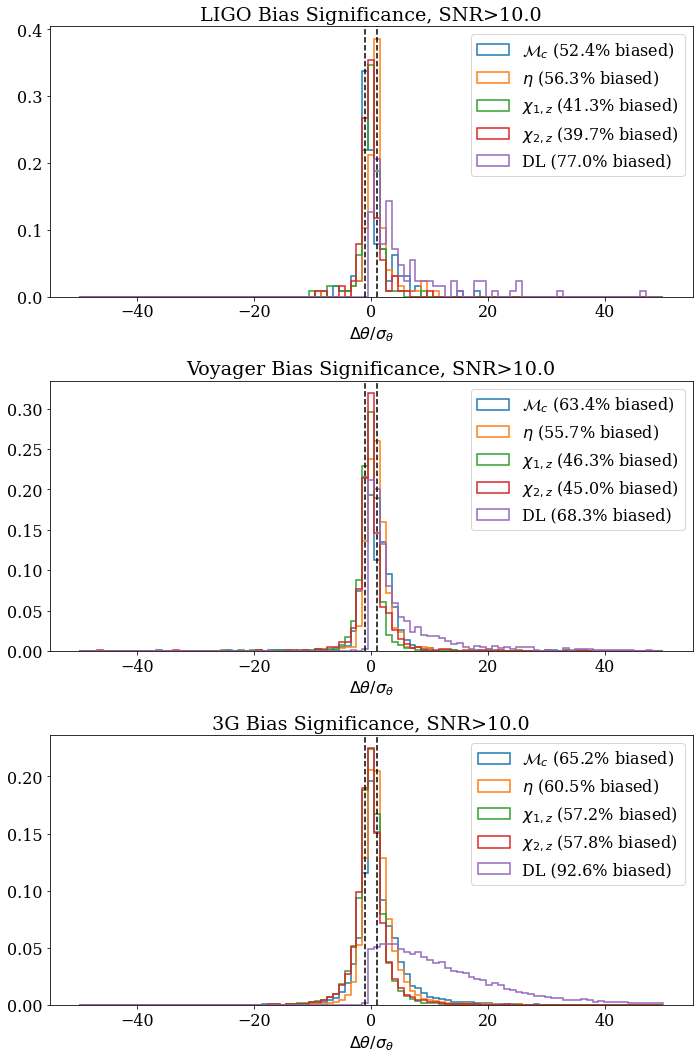

In [128]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

vars = ['Mc', 'eta', 'chi1z', 'chi2z', 'DL']
# vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']

labels = {
    'Mc': '$\mathcal{M}_c$',
    'eta': '$\eta$',
    'chi1z': '$\chi_{1,z}$',
    'chi2z': '$\chi_{2,z}$',
    'DL': 'DL',
    'm1': 'm$_1$',
    'm2': 'm$_2$'
}
# vars = ['Mc', 'eta', 'DL']
bins=np.linspace(-50, 50, 100)
# bins=30

snr_lim=10

bias_hist_plot(df_ligo, ax1, title='LIGO', vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
               lw=1.5, density=True, kde=False)

bias_hist_plot(df_voy, ax2, title='Voyager', vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
               lw=1.5, density=True, kde=False)

bias_hist_plot(df_3g, ax3, title='3G', vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
               lw=1.5, density=True, kde=False)

for ax in [ax1, ax2, ax3]:
    ax.axvline(x=1, color='k', ls='--')
    ax.axvline(x=-1, color='k', ls='--')
    # ax.set_xlim(-10, 30)
plt.tight_layout()
plt.show()

In [141]:
df[(df_3g["DL_full_bias"]<0)]

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Mc,eta,m1,m2,M_tot,q,chi1z,chi2z,DL,z,...,chi1z_stat_err,chi2z_stat_err,iota_stat_err,ra_stat_err,dec_stat_err,psi_stat_err,z_stat_err,z_full_bias,full_faith,full_inner_prod
42,15.310792,0.237634,22.163522,14.098565,36.262087,1.572041,-0.148268,-0.229921,27880.458991,3.178349,...,0.164405,0.180120,19.179041,0.030515,0.028813,0.318828,10.086442,-0.752363,0.0,0.905423
58,16.673775,0.248571,20.672390,17.765901,38.438291,1.163599,0.028784,-0.160218,13309.027345,1.727134,...,0.403571,0.505756,2.815405,0.005740,0.003525,0.109140,1.344307,-0.119474,0.0,0.893974
75,49.654817,0.239359,70.625149,46.467931,117.093081,1.519869,0.258047,-0.113446,72193.534570,7.146337,...,0.083853,0.191433,7.151988,0.014309,0.014740,0.212257,4.850486,-0.263308,0.0,0.627065
80,16.818100,0.249314,20.364399,18.337196,38.701595,1.110551,-0.182003,0.018579,15706.775540,1.977561,...,2.140273,1.970308,47.181930,0.011563,0.006315,0.149376,5.567310,-1.557198,0.0,0.903767
116,19.818614,0.232443,30.084782,17.479802,47.564584,1.721117,-0.025740,-0.396368,22572.424694,2.666097,...,0.016821,0.239960,4.407511,0.017195,0.010216,0.198356,3.203971,-0.344005,0.0,0.828037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,20.933891,0.240682,29.350528,19.851588,49.202117,1.478498,0.022350,0.053431,39856.892133,4.293274,...,0.266921,0.057467,5.939497,0.015443,0.012022,0.258717,6.563299,-0.883284,0.0,0.866638
18808,39.608121,0.249121,48.298081,42.890058,91.188139,1.126090,0.023160,-0.169342,74089.489862,7.309069,...,1.349021,1.540622,3.135655,0.021906,0.015822,0.295600,7.604504,-0.723803,0.0,0.740698
18941,50.920793,0.213157,89.073216,39.655485,128.728700,2.246176,-0.357969,0.126823,109659.493178,10.303952,...,0.330923,0.086544,12.132141,0.051249,0.043932,0.480829,17.170451,-0.111087,0.0,0.986314
19052,25.091601,0.245849,32.865145,25.362233,58.227378,1.295830,0.087043,0.007282,21193.088718,2.530481,...,0.023870,0.067442,3.494780,0.007988,0.003648,0.097117,1.838045,-1.196562,0.0,0.832137


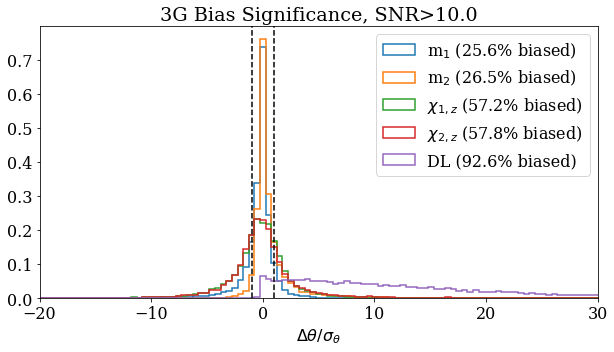

In [136]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
vars = ['m1', 'm2', 'chi1z', 'chi2z', 'DL']
bins=np.linspace(-50, 50, 200)


bias_hist_plot(df_3g, ax, title='3G', vars=vars, bins=bins, labels=labels, snr_lim=snr_lim,
               lw=1.5, density=True, kde=False)
ax.axvline(x=1, color='k', ls='--')
ax.axvline(x=-1, color='k', ls='--')
plt.xlim(-20, 30)

plt.savefig('1D_bias_plots/3g_bias_sig_hist.pdf')

plt.show()
